**Todo list**
1. Data overview
2. Data cleaning
-----------------
3. Create new data - date
4. Data visualization
5. Convert data
6. Create Good CV
7. Modeling

In [1]:
import pandas as pd
import json
import numpy as np

# convert json in df to columns
from pandas.io.json import json_normalize

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
from sklearn import preprocessing

# Load data
Just load 100000 rows for the EDA's sake



In [4]:
%%time
nrows = None
json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']

json_conv = {col: json.loads for col in (json_cols)}

df_train = pd.read_csv("../data/train.csv", 
    dtype={'fullVisitorId': str},
    converters=json_conv,
    low_memory=False,
    parse_dates=['date'],
    nrows=nrows)

CPU times: user 36.6 s, sys: 8.16 s, total: 44.8 s
Wall time: 52.1 s


In [5]:
%%time

df_test = pd.read_csv('../data/test.csv',
    dtype={'fullVisitorId': str},
    converters=json_conv,
    low_memory=False,
    nrows=nrows)

CPU times: user 32.4 s, sys: 9.75 s, total: 42.2 s
Wall time: 50.9 s


## Convert the json columns

In [6]:
# convert json columns into signle columns
def decode_json(df_raw,json_cols):
    df = df_raw.copy()
    for column in json_cols:
        tdf = json_normalize(df[column])
        df = df.drop(columns = [column])
        tdf.columns = [column + '_' + col for col in tdf.columns]
        df = df.merge(tdf, left_index=True, right_index=True)
    return df
        

In [7]:
%%time
df_train = decode_json(df_train,json_cols)


CPU times: user 2min 9s, sys: 58.7 s, total: 3min 8s
Wall time: 3min 34s


In [8]:
%%time
df_test = decode_json(df_test,json_cols)

CPU times: user 1min 55s, sys: 39.4 s, total: 2min 35s
Wall time: 2min 53s


In [9]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


# Data overview

In [10]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [11]:
df_train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserSize', 'device_browserVersion',
       'device_deviceCategory', 'device_flashVersion', 'device_isMobile',
       'device_language', 'device_mobileDeviceBranding',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_screenColors', 'device_screenResolution', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_latitude', 'geoNetwork_longitude', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_networkLocation',
       'geoNetwork_region', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_transactionRevenue

## totals_transactionRevenue

In [12]:
df_train.totals_transactionRevenue = df_train['totals_transactionRevenue'].fillna(0).astype(float)

In [13]:
df_train.totals_transactionRevenue = np.log1p(df_train['totals_transactionRevenue'])

create a new is_bought variables for the sake of visualization

In [14]:
df_train['is_bought'] = df_train['totals_transactionRevenue'] > 0

In [15]:
print('The data is highly unbalanced')
df_train.is_bought.value_counts()

The data is highly unbalanced


False    892138
True      11515
Name: is_bought, dtype: int64

# Data cleaning
This data contains json in some columns, we need to convert into indivitual columns

## Handle NA data

**Percetage of missing value in data**

But some of these Na isn't real Na. For example totals_transactionRevenue has default value for 0 is Na

In [16]:
df_train['geoNetwork_city']

0                                 Izmir
1         not available in demo dataset
2                                Madrid
3         not available in demo dataset
4         not available in demo dataset
5         not available in demo dataset
6         not available in demo dataset
7                              Brisbane
8         not available in demo dataset
9         not available in demo dataset
10        not available in demo dataset
11        not available in demo dataset
12                                Izmir
13                              Karachi
14        not available in demo dataset
15        not available in demo dataset
16        not available in demo dataset
17                                Paris
18                            Singapore
19                         Buenos Aires
20        not available in demo dataset
21                            (not set)
22        not available in demo dataset
23                              Bangkok
24                              Jakarta


In [17]:
print('Percetage of missing value in data')
(df_train.isnull().sum().sort_values(ascending=False)*100/len(df_train))[:15]

Percetage of missing value in data


trafficSource_campaignCode                      99.999889
trafficSource_adContent                         98.788694
trafficSource_adwordsClickInfo.adNetworkType    97.625195
trafficSource_adwordsClickInfo.slot             97.625195
trafficSource_adwordsClickInfo.page             97.625195
trafficSource_adwordsClickInfo.isVideoAd        97.625195
trafficSource_adwordsClickInfo.gclId            97.614018
trafficSource_isTrueDirect                      69.678073
trafficSource_referralPath                      63.377425
trafficSource_keyword                           55.655102
totals_bounces                                  50.132407
totals_newVisits                                22.198012
totals_pageviews                                 0.011066
device_mobileDeviceInfo                          0.000000
device_browserSize                               0.000000
dtype: float64

### Replace NA string to NA

In [18]:
cols_to_replace = {
    'socialEngagementType' : 'Not Socially Engaged',
    'device_browserSize' : 'not available in demo dataset', 
    'device_flashVersion' : 'not available in demo dataset', 
    'device_browserVersion' : 'not available in demo dataset', 
    'device_language' : 'not available in demo dataset',
    'device_mobileDeviceBranding' : 'not available in demo dataset',
    'device_mobileDeviceInfo' : 'not available in demo dataset',
    'device_mobileDeviceMarketingName' : 'not available in demo dataset',
    'device_mobileDeviceModel' : 'not available in demo dataset',
    'device_mobileInputSelector' : 'not available in demo dataset',
    'device_operatingSystemVersion' : 'not available in demo dataset',
    'device_screenColors' : 'not available in demo dataset',
    'device_screenResolution' : 'not available in demo dataset',
    'geoNetwork_city' : 'not available in demo dataset',
    'geoNetwork_cityId' : 'not available in demo dataset',
    'geoNetwork_latitude' : 'not available in demo dataset',
    'geoNetwork_longitude' : 'not available in demo dataset',
    'geoNetwork_metro' : ['not available in demo dataset', '(not set)'], 
    'geoNetwork_networkDomain' : 'unknown.unknown', 
    'geoNetwork_networkLocation' : 'not available in demo dataset',
    'geoNetwork_region' : 'not available in demo dataset',
    'trafficSource_adwordsClickInfo.criteriaParameters' : 'not available in demo dataset',
    'trafficSource_campaign' : '(not set)', 
    'trafficSource_keyword' : '(not provided)'
}

In [19]:
%%time
df_train = df_train.replace(cols_to_replace, 'NA')

CPU times: user 1min 37s, sys: 9.93 s, total: 1min 47s
Wall time: 1min 49s


In [20]:
%%time
df_test = df_test.replace(cols_to_replace, 'NA')

CPU times: user 1min 31s, sys: 18.8 s, total: 1min 50s
Wall time: 1min 57s


### trafficSource_campaign

In [21]:
df_train['trafficSource_campaign'].value_counts()

NA                                                 865347
Data Share Promo                                    16403
AW - Dynamic Search Ads Whole Site                  14244
AW - Accessories                                     7070
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: trafficSource_campaign, dtype: int64

Just 1 campaign for the whole data set. It doesn't help any things

Delete it

In [22]:
df_train.drop('trafficSource_campaign',axis=1,inplace=True)
df_test.drop('trafficSource_campaign',axis=1,inplace=True)
df_train.drop('trafficSource_campaignCode',axis=1,inplace=True)

### trafficSource_adContent 98.675 %

In [23]:
nan_bought_count = df_train[~df_train['trafficSource_adContent'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 143 people has non-nan value has bought


None of the revenue come from adsoruce, so we can delete it

In [24]:
del df_train['trafficSource_adContent']
del df_test['trafficSource_adContent']

### trafficSource_adwordsClickInfo.slot - 97.426

In [25]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.slot'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 454 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [26]:
del df_train['trafficSource_adwordsClickInfo.slot']
del df_test['trafficSource_adwordsClickInfo.slot']

### trafficSource_adwordsClickInfo.adNetworkType

In [27]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.adNetworkType'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 454 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [28]:
del df_train['trafficSource_adwordsClickInfo.adNetworkType']
del df_test['trafficSource_adwordsClickInfo.adNetworkType']

### trafficSource_adwordsClickInfo.page 

In [29]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.page'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 454 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [30]:
del df_train['trafficSource_adwordsClickInfo.page']
del df_test['trafficSource_adwordsClickInfo.page']

### trafficSource_adwordsClickInfo.isVideoAd

In [31]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.isVideoAd'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 454 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [32]:
del df_train['trafficSource_adwordsClickInfo.isVideoAd']
del df_test['trafficSource_adwordsClickInfo.isVideoAd']

### trafficSource_adwordsClickInfo.gclId

In [33]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.gclId'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 456 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [34]:
del df_train['trafficSource_adwordsClickInfo.gclId']
del df_test['trafficSource_adwordsClickInfo.gclId']

### trafficSource_isTrueDirect

In [35]:
df_train['trafficSource_isTrueDirect'].value_counts()

True    274005
Name: trafficSource_isTrueDirect, dtype: int64

In [36]:
df_train['trafficSource_isTrueDirect'].fillna(False,inplace=True)
df_test['trafficSource_isTrueDirect'].fillna(False,inplace=True)

### trafficSource_referralPath



In [37]:
nan_bought_count = df_train[~df_train['trafficSource_referralPath'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 5415 people has non-nan value has bought


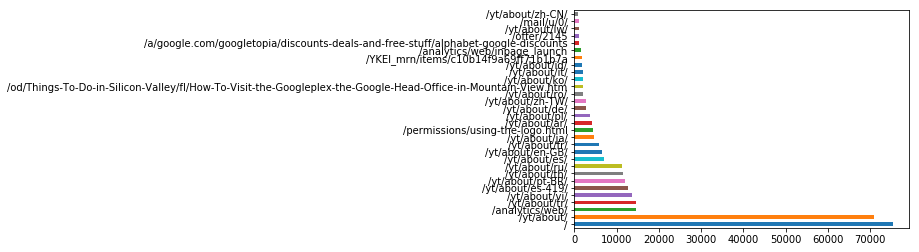

In [38]:
df_train['trafficSource_referralPath'].value_counts().sort_values(ascending=False)[:30].plot(kind='barh')

In [39]:
df_train['trafficSource_referralPath']

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
5                                                       NaN
6                                                       NaN
7                                                       NaN
8                                                       NaN
9                                                       NaN
10                                                      NaN
11                                                      NaN
12                                                      NaN
13                                                      NaN
14                                                      NaN
15                                                      NaN
16                                      

In [40]:
df_train['trafficSource_referralPath'].fillna('NA',inplace=True)
df_test['trafficSource_referralPath'].fillna('NA',inplace=True)

### trafficSource_keyword

In [41]:

df_train['trafficSource_keyword'].fillna('NA',inplace=True)
df_test['trafficSource_keyword'].fillna('NA',inplace=True)

### totals_bounces

In [42]:
df_train['totals_bounces'].fillna(0,inplace=True)
df_test['totals_bounces'].fillna(0,inplace=True)

### totals_newVisits

In [43]:
df_train['totals_newVisits'].fillna(0,inplace=True)
df_test['totals_newVisits'].fillna(0,inplace=True)

### totals_pageviews

In [44]:
df_train['totals_pageviews'].fillna(0,inplace=True)
df_test['totals_pageviews'].fillna(0,inplace=True)

## Remove constant columns

Create a new df with filled na to find the actual column with constant values

In [45]:
const_cols = []
for col in df_train.columns:
    if len(df_train[col].unique()) == 1:
        const_cols.append(col)
df_train.drop(const_cols,axis=1,inplace=True)
df_test.drop(const_cols,axis=1,inplace=True)
print(f'Dropped {len(const_cols)} constant columns')
    

Dropped 19 constant columns


In [46]:
df_train.isnull().sum()

channelGrouping               0
date                          0
fullVisitorId                 0
sessionId                     0
visitId                       0
visitNumber                   0
visitStartTime                0
device_browser                0
device_deviceCategory         0
device_isMobile               0
device_operatingSystem        0
geoNetwork_city               0
geoNetwork_continent          0
geoNetwork_country            0
geoNetwork_metro              0
geoNetwork_networkDomain      0
geoNetwork_region             0
geoNetwork_subContinent       0
totals_bounces                0
totals_hits                   0
totals_newVisits              0
totals_pageviews              0
totals_transactionRevenue     0
trafficSource_isTrueDirect    0
trafficSource_keyword         0
trafficSource_medium          0
trafficSource_referralPath    0
trafficSource_source          0
is_bought                     0
dtype: int64

# Save data

In [47]:
del df_train['is_bought']

In [48]:
df_train.to_csv('../data/train_.csv')
df_test.to_csv('../data/test_.csv')

## Convert data

In [49]:
# for col in df_train.columns:
#     print(col)
#     print(type(df_train[col][0]))
#     print(df_train[col][0])
#     print('-'*100)

In [50]:
# df_train['totals_bounces'].value_counts()

In [51]:
# id_cols = ['fullVisitorId','sessionId','visitId']
# cat_cols = ['channelGrouping','device_browser','device_deviceCategory','device_operatingSystem','geoNetwork_city',
#            'geoNetwork_continent','geoNetwork_country','geoNetwork_metro','geoNetwork_networkDomain','geoNetwork_region',
#            'geoNetwork_subContinent','trafficSource_keyword','trafficSource_medium','trafficSource_referralPath',
#            'trafficSource_source']
# num_cols = ['visitNumber','visitNumber','totals_bounces','totals_hits','totals_newVisits','totals_pageviews']
# date_cols = ['date','visitStartTime']
# bool_cols = ['device_isMobile','trafficSource_isTrueDirect']

In [52]:
# print('Enough columns',len(df_train.columns)) if len(id_cols)+ len(cat_cols) + len(num_cols) + len(date_cols) + len(bool_cols)+1 == len(df_train.columns) else print('Not enough columns')


The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

# Convert data

look at timeseries data and find the best cv

add date data

**Label encoding data**

In [53]:

# for col in cat_cols:
#     lb = preprocessing.LabelEncoder() 
#     lb.fit(df_train[col])
#     lb.transform(df_train[col])
#     lb.transform(df_test[col])
#     print(col)
    